In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

In [22]:
X_train = pd.read_csv("../data/processed/rapists_X_train.csv", index_col=False)
X_test = pd.read_csv("../data/processed/rapists_X_test.csv", index_col=False)
X_train.head()

,vict_age,vict_descent,weekday
0,30,0,6
1,26,0,6
2,51,2,6
3,21,0,3
4,40,2,1


In [23]:
model = KMeans(n_clusters = 2,n_init="auto", random_state = 14)
model.fit(X_train)

KMeans(n_clusters=2, n_init='auto', random_state=14)

In [24]:
y_train = model.labels_

In [25]:
y_test = model.predict(X_test)

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn_model.predict(X_train)

In [28]:
accuracy_score(y_train, y_pred)

0.9961538461538462

In [29]:
y_pred_test = knn_model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred_test)

0.9846153846153847

In [31]:

best_accuracy = 0
best_combination = None

param_grid  = {
    "n_neighbors":[3,5,7],
    "weights": ["uniform","distance"],
    "algorithm": ["auto", "kd_tree", "brute"], 
    'metric':["euclidean"]#,"manhattan","cityblock","minkowski"
    
}

for combination in ParameterGrid(param_grid):
    model = KNeighborsClassifier(**combination)
    print(model)
    model.fit(X_train, y_train)   
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    print("Combination:", combination)
    print("Accuracy:", acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_combination = combination
        
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.9961538461538462
KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9961538461538462
KNeighborsClassifier(metric='euclidean', weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.9961538461538462
KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
Combination: {'algorithm': 

In [32]:
best_model = KNeighborsClassifier(**best_combination)
best_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [33]:
y_pred = best_model.predict(X_train)

In [34]:
accuracy_score(y_train, y_pred)

1.0

In [35]:
y_pred_test = best_model.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred_test)

0.9846153846153847

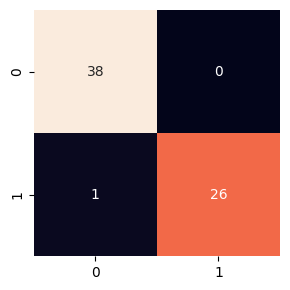

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
bank_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()